# Machine Learning

## Learning Exercise

## Single Neuron

***

![Single_Neuron](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/Single_Neuron.svg?raw=true)


## Single Input

***

![Single_Input](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/data/single_input.svg?raw=true)


$$y = mx + c$$

$$ \phi (x) = x $$

$$ \phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$


In [108]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Neural networks.
import tensorflow.keras as keras

In [109]:
# Identity activation function.
def identity(x):
    return x

In [110]:
# Firing a neuron.
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [111]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [112]:
fire_neuron(x, w, identity)

14.0

## Data

***

In [113]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)
data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [114]:
# Real-world output values.
# We have set the out data as 4 times the input with some noise
# The number we should be aiming for is 4
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))
data_out

array([ 3.67792898,  7.2570694 , 11.092158  , 17.60780247, 20.02823056,
       24.2539163 , 28.98223809, 30.87155674, 35.26206105, 40.92509503,
       44.58657819, 46.57807929])

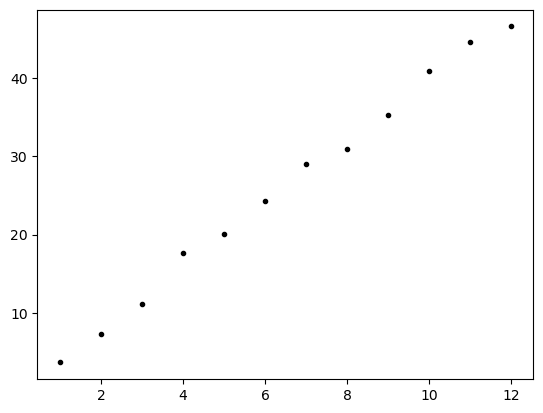

In [115]:
plt.plot(data_in, data_out, 'k.')

## Training

In [116]:
# An index in the data set.
i = 5

In [117]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 24.253916297797122)

In [118]:
# Initial weights.
# the intial weight will be set to 1 
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [119]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# The wieght should increase to find what was set above to as 4 
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

Improve the vector of W

Predicted values of w

In [120]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [121]:
# An index in the data set.
i = 5

In [122]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

333.2054602069834

In [123]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

0.06447348628699691

## Training

To improve the weights of w1 not w0

Cost function reduce a w improves

In [124]:
# Hyperparameter.
# In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training. 
# https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)
# adding the learning_rate to w (weights) 

learning_rate = 0.001

In [125]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [126]:
# Set some initial weights.
w = np.array([0.0, 1.0])
w

array([0., 1.])

In [127]:
# The training values.
# We have an input of our real world value 6 
# Then the output of our real world value of 24.263911860025733
data_in[i], data_out[i]

(6.0, 24.253916297797122)

In [128]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [129]:
# Nudge the weights towards better values.
# If the nueron is improved the learning_rate is added
#  w = array([0., 1.])
# this makes w now = array([0.   , 1.001])
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [130]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

Now create a loop through each of the data points, 

As the loop w increases and ends up close to the number 4

Test:

 - array([0.   , 4.094])
 - array([0.   , 3.982])
 - array([0.   , 3.996])

In [131]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 3.918])

In [132]:
# Check with polyfit this provises y as well which should be zero.
np.polyfit(data_in,data_out, 1)

array([ 3.99380205, -0.03282045])

To outsource the process above, This is the reason why we use Keras and tensorflow.

## Using Keras

***

To get it time to do something useful is an art.
Conversions from statistic to machine learning.

Keras has alot more infomration on the readme of thier github page
https://github.com/keras-team/keras

 - Being able to go from idea to result as fast as possible is key to doing good research.

TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:
- Efficiently executing low-level tensor operations on CPU, GPU, or TPU
- Computing the gradient of arbitrary differentiable expressions.
- Scaling computation to many devices, such as clusters of hundreds of GPUs.
- Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.

TensorFlow is a suite of tools, Keras sits on top.


https://keras.io/getting_started/
https://keras.io/getting_started/ecosystem/

https://keras.io/guides/sequential_model/


## Using TensorFlow

https://www.tensorflow.org/

This can be installed by itself 

https://www.tensorflow.org/install

Can install via pip

For the course we use conda to install with a simple command.

conda install tensorflow


What is a tensor?
https://en.wikipedia.org/wiki/Tensor
Vectors row of number or list of number
Metric is several row or list of numbers
A tensor may be represented as an array (potentially multidimensional). Just as a vector in an n-dimensional space is represented by a one-dimensional array with n components with respect to a given basis, any tensor with respect to a basis is represented by a multidimensional array. For example, a linear operator is represented in a basis as a two-dimensional square n × n array. The numbers in the multidimensional array are known as the scalar components of the tensor or simply its components. They are denoted by indices giving their position in the array, as subscripts and superscripts, following the symbolic name of the tensor. 


https://numpy.org/

Powerful N-dimensional arrays
Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today.

https://numpy.org/devdocs/user/absolute_beginners.html

The NumPy library contains multidimensional array and matrix data structures (you’ll find more information about this in later sections). It provides ndarray, a homogeneous n-dimensional array object, with methods to efficiently operate on it.

Numpy is effiient at ndarray 


https://www.dictionary.com/e/homogeneous-vs-heterogeneous/

What is homogenous and example?
Image result for homogenous
Homogeneous mixtures are uniform in structure or composition


https://en.wikipedia.org/wiki/Directed_graph
Directed_graph.png


https://en.wikipedia.org/wiki/Dataflow_programming


https://www.easy-tensorflow.com/tf-tutorials/basics/graph-and-session
tensorflowgraph.png

Input are the tensors, with the operations applied to them, building up tensors which are multi dimensional arrays.

TensorFlows are just building a graph, different operation.

Tensors tend to use the GPU.

Keras is much higher level, provides a easy way to not think about the tensorflows under the hood.


### Using Keras example from the github

https://github.com/keras-team/keras

First contact with Keras

https://github.com/microsoft/vscode-jupyter/wiki/Kernel-crashes

Canceled future for execute_request message before replies were done
The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.

 https://stackoverflow.com/a/53014308

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [133]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [134]:
# Create a new sequential neural network.
model = keras.Sequential()

In [135]:
# Add a dense layer with 64 neurons and use the relu activation function.
model.add(keras.layers.Dense(units=64, activation='relu'))

In [136]:
# Add a dense layer with 10 neurons and the softmax activation function.
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [137]:
# Compile the neural network.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [138]:
# Create a fake training data set.
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))

In [139]:
# Train the neural network. 
# epochs id the number of times go over the training dataset 
# batch_size go over the taining set 32 time
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 13.4321 - accuracy: 0.0600
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 13.3462 - accuracy: 0.0600
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 13.2849 - accuracy: 0.0500
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 13.2250 - accuracy: 0.0500
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 13.1766 - accuracy: 0.0500


In [140]:
# Create a fake training data set.
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [141]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 132ms/step - loss: 12.7388 - accuracy: 0.3000


In [142]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 48ms/step


In [143]:
classes

array([[0.07866715, 0.07496887, 0.01841225, 0.07431408, 0.13339731,
        0.1313711 , 0.18066528, 0.03506715, 0.19717872, 0.07595806],
       [0.0497275 , 0.04011749, 0.01023495, 0.07067879, 0.19270399,
        0.16821715, 0.28779104, 0.05828061, 0.01174988, 0.11049858],
       [0.02242211, 0.0365527 , 0.0070696 , 0.22449261, 0.04551483,
        0.07189406, 0.28735945, 0.03107585, 0.20861828, 0.06500045],
       [0.01780004, 0.1438425 , 0.02626756, 0.24493916, 0.10450444,
        0.11985846, 0.09333497, 0.0397975 , 0.10502688, 0.10462847],
       [0.05361564, 0.216642  , 0.03416926, 0.06831813, 0.14233533,
        0.10283941, 0.11453288, 0.10329787, 0.05501849, 0.10923101],
       [0.03503779, 0.18041621, 0.09066347, 0.06577277, 0.19337404,
        0.09379555, 0.06143993, 0.03784299, 0.10893519, 0.13272205],
       [0.09200723, 0.0264956 , 0.02594303, 0.19515656, 0.19438043,
        0.10664336, 0.212052  , 0.04764522, 0.03378501, 0.06589165],
       [0.03905092, 0.07190084, 0.0314844

## Single Neuron in Keras

***

https://keras.io/api/layers/activations/


https://keras.io/api/losses/

https://keras.io/api/losses/regression_losses/#meansquarederror-class

In [144]:
# Create a new sequential neural network.
model = keras.Sequential()

In [145]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [146]:
# Compile the neural network. 
# https://keras.io/api/losses/regression_losses/#meansquarederror-class
# mean_squared_error is a loss function "loss = square(y_true - y_pred)" , we've been calling it a cost function "(y - pred)**2". 
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])


In [147]:
# Real-world input values from data section above 
data_in = np.arange(1.0, 13.0, 1.0)

# https://stackoverflow.com/a/47468541
# issue with a Keras thinks as input values as an array, as we have only choosen 1 neuron
# This creates an elements asindiviual arrays, think of it as Transposing a dataset means swapping so that the rows become a column
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.]])

In [148]:
# Real-world output values.
# We have set the out data as 4 times the input with some noise
# The number we should be aiming for is 4
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)
data_out

array([[ 3.84260932],
       [ 8.70138099],
       [12.34126164],
       [16.27595239],
       [20.14069787],
       [24.08240339],
       [29.4584492 ],
       [32.0715053 ],
       [35.27684111],
       [42.14075562],
       [42.55811563],
       [47.44635269]])

In [149]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
1/1 [==============================] - 0s 347ms/step - loss: 510.1041 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 5.7906 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 0.8482 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 0.7997 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7992 - accuracy: 0.0000e+00


In [150]:
# Test input values.
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
preds = model.predict(data_test)

32/32 [==============================] - 0s 683us/step


In [151]:
data_test.flatten()[0]

-10.0

In [157]:
data_in.flatten()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [158]:
data_out.flatten()



array([ 3.84260932,  8.70138099, 12.34126164, 16.27595239, 20.14069787,
       24.08240339, 29.4584492 , 32.0715053 , 35.27684111, 42.14075562,
       42.55811563, 47.44635269])

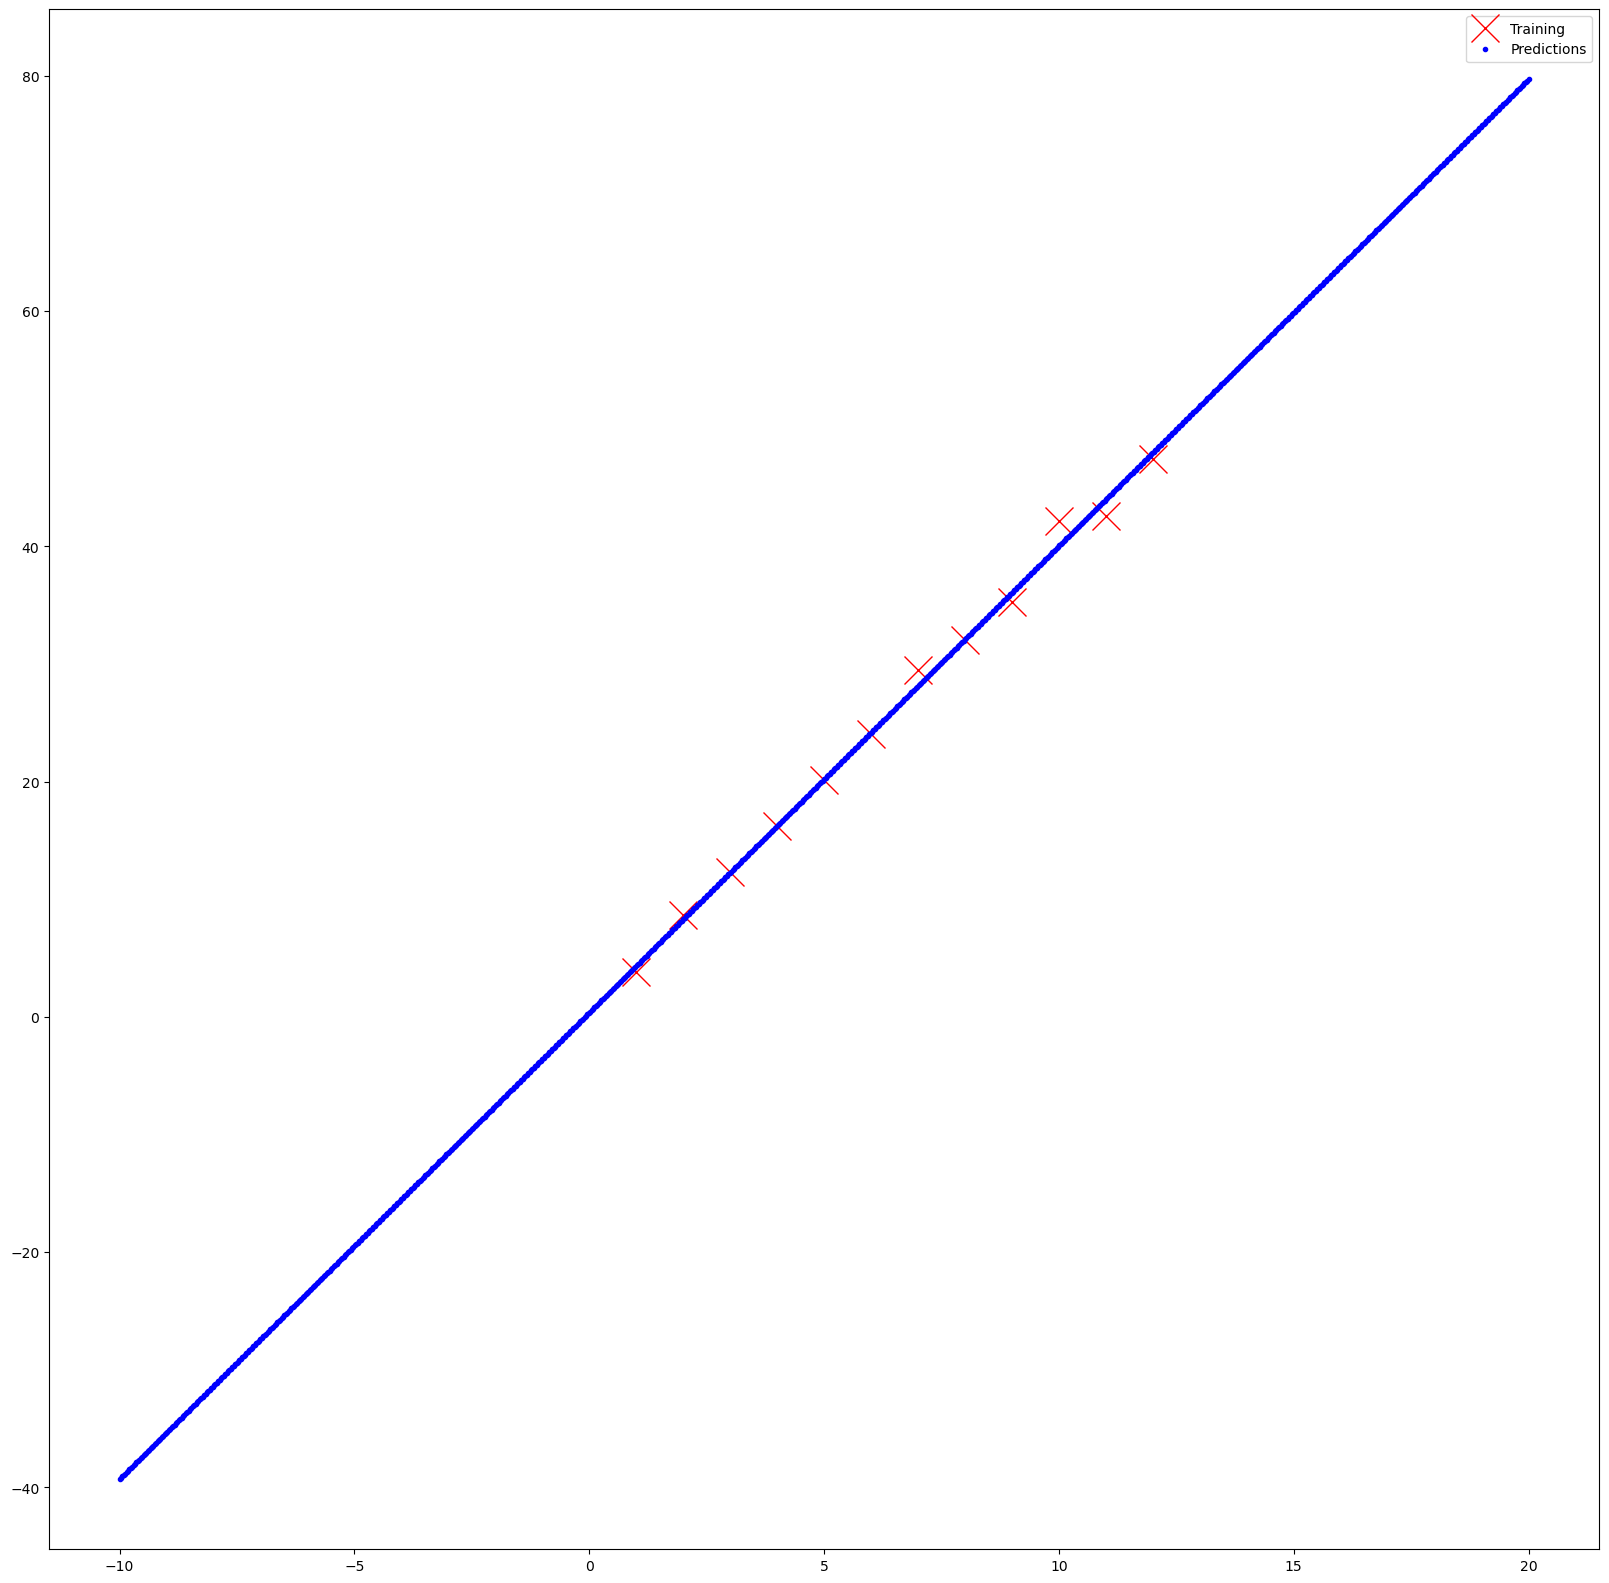

In [159]:
# Plot Fig size
plt.rcParams["figure.figsize"] = (20,20)

# Plot to illustrate the different degrees so that we can achieve a minimum error or minimum cost function.

# https://stackoverflow.com/a/23210293

plt.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training', markersize=20, linewidth=3)
plt.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions')


plt.legend()

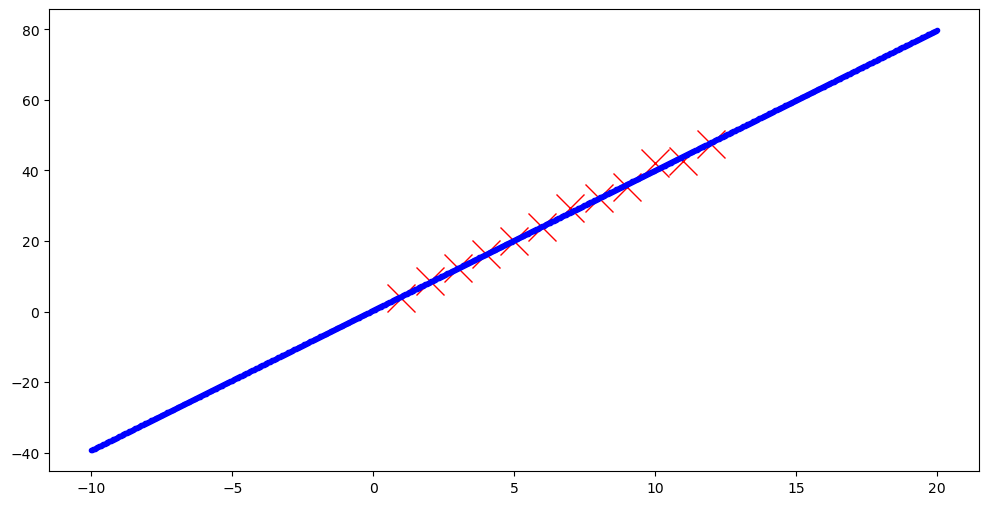

In [156]:
# Plot the values.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set.
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training', markersize=20, linewidth=3)

# Plot the predicted data set.
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions')



<hr style="border-top: 1px solid rgb(0, 91, 94);" />

## Conclusion




<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>References</h3>

[1]

[2]

[3]

[4]

[5]

[6]

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3>END</h3>